In [215]:
import numpy as np
import pandas as pd

In [216]:
col_names = ["code-number", "clump", "cell-size", "cell-shape","marginal-adhesion", "epithelial-cell-size", "bare-nuclei",
             "bland-chromatin", "normal-nucleoli", "mitoses", "class"]

In [217]:
df = pd.read_csv('BreastCancerWc.csv', names=col_names, na_values='?')
df.head()

,code-number,clump,cell-size,cell-shape,marginal-adhesion,epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


# Pre Processing

In [218]:
df.shape

(699, 11)

In [219]:
df.isna().sum()

code-number              0
clump                    0
cell-size                0
cell-shape               0
marginal-adhesion        0
epithelial-cell-size     0
bare-nuclei             16
bland-chromatin          0
normal-nucleoli          0
mitoses                  0
class                    0
dtype: int64

In [220]:
df['bare-nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [221]:
df['bare-nuclei'].fillna(df['bare-nuclei'].mode()[0], inplace=True)

In [222]:
df.isna().sum()

code-number             0
clump                   0
cell-size               0
cell-shape              0
marginal-adhesion       0
epithelial-cell-size    0
bare-nuclei             0
bland-chromatin         0
normal-nucleoli         0
mitoses                 0
class                   0
dtype: int64

In [223]:
# remove outliers

import seaborn as sns
import matplotlib.pyplot as plt

def visBoxplot(df):
    
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    cols = len(numeric_cols)
    
    rows = (cols + 3) // 4
    cols = min(cols, 4)
    
    fig,axes = plt.subplots(rows, cols, figsize=(16, rows*4))
    
    if rows > 1:
        axes = axes.flatten()
        
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
        
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()
    
# visBoxplot(df)

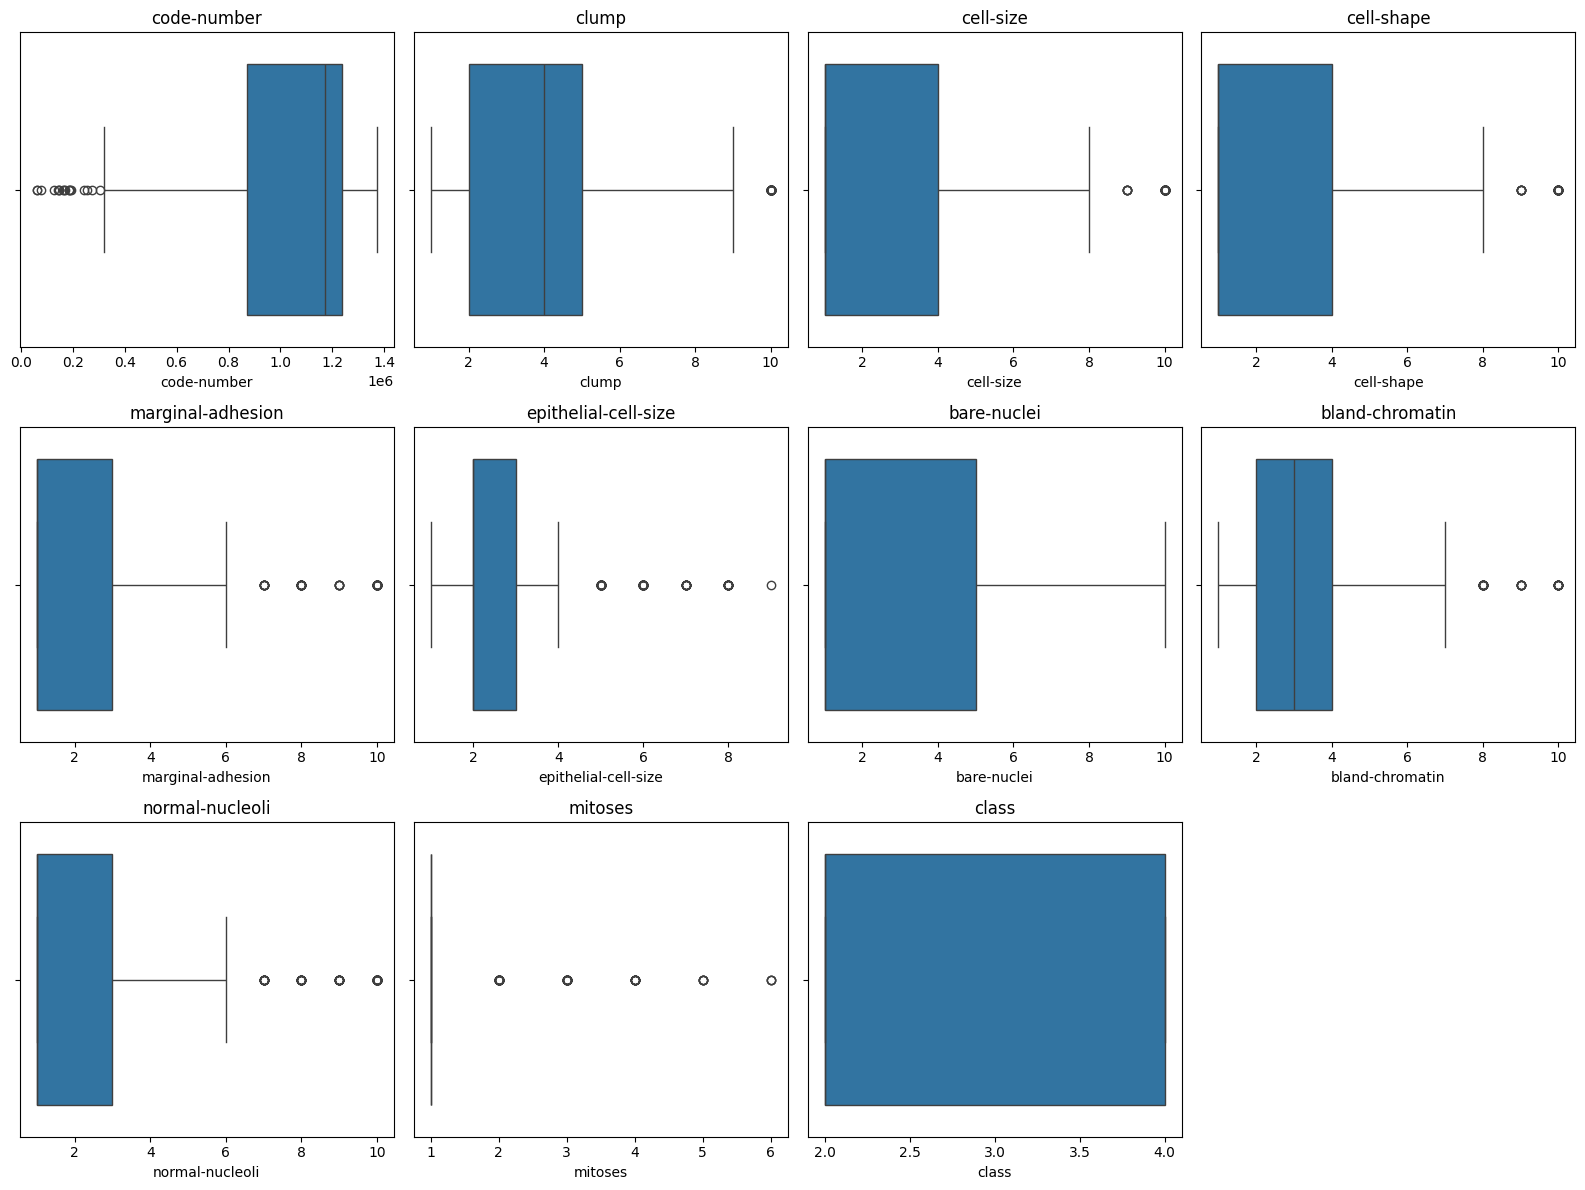

In [224]:
def rem1(df):
    numeric_cols = df.select_dtypes(include=['number'])
    zscore = np.abs((numeric_cols - numeric_cols.mean()) / (numeric_cols.std()))
    out = zscore > 3
    df = df[~out.any(axis=1)]
    return df

def rem2(df):
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3- Q1
    
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    outliers = (df < lower_threshold) | (df > upper_threshold)
    
    # print(outliers.sum())
    
    df = df[~((df < lower_threshold) | (df > upper_threshold)).any(axis=1)]
    
    return df

ndf = rem1(df)
df = ndf
visBoxplot(df)

In [225]:
# check negatives
# check negatives
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    # Check if any values in the column are negative
    negative_count = (df[col] < 0).sum()
    print(f"Negative values in column '{col}': {negative_count}")


Negative values in column 'code-number': 0
Negative values in column 'clump': 0
Negative values in column 'cell-size': 0
Negative values in column 'cell-shape': 0
Negative values in column 'marginal-adhesion': 0
Negative values in column 'epithelial-cell-size': 0
Negative values in column 'bare-nuclei': 0
Negative values in column 'bland-chromatin': 0
Negative values in column 'normal-nucleoli': 0
Negative values in column 'mitoses': 0
Negative values in column 'class': 0


# Data Transformation

In [226]:
dfr = df

from sklearn.preprocessing import LabelEncoder
df

,code-number,clump,cell-size,cell-shape,marginal-adhesion,epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [227]:
scaler = LabelEncoder()
scaler.fit(df['class'])
scaler.classes_

array([2, 4], dtype=int64)

In [228]:
df['class'] = scaler.transform(df['class'])
df['class'].unique()

array([0, 1], dtype=int64)

# Model Building

<AxesSubplot:>

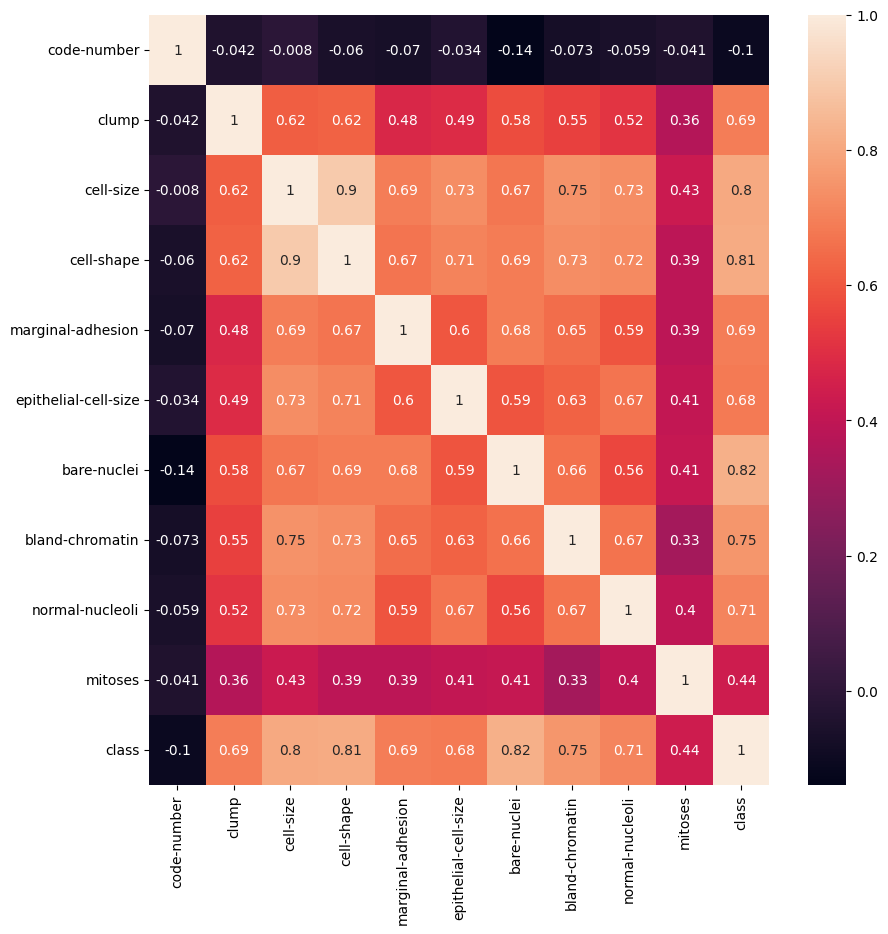

In [229]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [231]:
X = dfr.drop('class', axis=1)
Y = dfr['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [232]:
modelLR = LogisticRegression()
modelLR.fit(X_train, Y_train)

LogisticRegression()

In [233]:
y_pred = modelLR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [235]:
accuracy_score(Y_test, y_pred)

0.7098765432098766

In [237]:
modelNB = GaussianNB()
modelNB.fit(X_train, Y_train)

GaussianNB()

In [238]:
y_predNB = modelNB.predict(X_test)

In [239]:
accuracy_score(Y_test, y_predNB)

0.808641975308642